In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn import datasets
from sklearn import manifold
%matplotlib inline

In [2]:
df = pd.read_csv('wqr.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

In [5]:
df.loc[:,'quality'] =df.quality.map(quality_mapping)

In [6]:
df =df.sample(frac=1).reset_index(drop=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.9,0.29,0.35,1.9,0.067,25.0,57.0,0.99700,3.18,1.36,10.3,3
1,6.2,0.63,0.31,1.7,0.088,15.0,64.0,0.99690,3.46,0.79,9.3,2
2,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,2
3,9.1,0.28,0.46,9.0,0.114,3.0,9.0,0.99901,3.18,0.60,10.9,3
4,9.5,0.46,0.24,2.7,0.092,14.0,44.0,0.99800,3.12,0.74,10.0,3


In [7]:
df_train = df.head(1000)
df_test = df.tail(5999)

In [8]:
from sklearn import tree
from sklearn import metrics
clf = tree.DecisionTreeClassifier(max_depth=7)

cols = ['fixed acidity',  'volatile acidity',  'citric acid', 'chlorides', 'residual sugar',  'chlorides',  'free sulfur dioxide',  'total sulfur dioxide',  'density',  'pH',  'sulphates',  'alcohol'] 
clf.fit(df_train[cols],df_train.quality)

DecisionTreeClassifier(max_depth=7)

In [9]:
train_predictions = clf.predict(df_train[cols])

test_predictions = clf.predict(df_test[cols])

train_accuracy = metrics.accuracy_score(
    df_train.quality,train_predictions
)
test_accuracy = metrics.accuracy_score(df_test.quality,test_predictions)

In [10]:
print('Training  Accuracy',train_accuracy)
print("testing Accuracy",test_accuracy)

Training  Accuracy 0.774
testing Accuracy 0.7110694183864915


In [11]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rc('xtick',labelsize=20)
matplotlib.rc('ytick',labelsize=20)
%matplotlib inline

In [12]:
train_accuracies =[0.5]
test_accuracies =[0.5]
for depth in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    cols = ['fixed acidity',  'volatile acidity',  'citric acid', 'chlorides', 'residual sugar',  'chlorides',  'free sulfur dioxide',  'total sulfur dioxide',  'density',  'pH',  'sulphates',  'alcohol'] 
    clf.fit(df_train[cols],df_train.quality)
    train_predictions = clf.predict(df_train[cols])
    tesr_predictions = clf.predict(df_test[cols])
    train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality,test_predictions)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracies)
    



In [15]:
# plt.figure(figsize=(10, 5))
# sns.set_style("whitegrid")
# plt.plot(train_accuracies, label="train accuracy")
# plt.plot(test_accuracies, label="test accuracy")
# plt.legend(loc="upper left", prop={'size': 15})  
# plt.xticks(range(0, 26, 5))  
# plt.xlabel("max_depth", size=20) 
# plt.ylabel("accuracy", size=20)  
# plt.show()   


 

Text(0, 0.5, 'count')

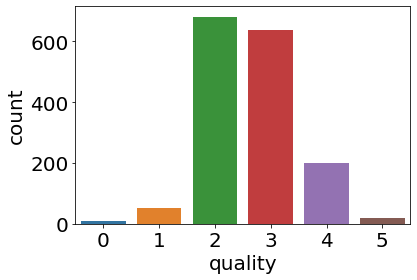

In [13]:
b=sns.countplot(x='quality',data=df)
b.set_xlabel("quality",fontsize=20)
b.set_ylabel("count",fontsize=20)